# Heart Disease

<center>When tienes Exposicion de IA</center>
<img src="heart-attack.jpg" width="300px"> 

# Importando las librerías

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [283]:
trainx = pd.read_csv("./heart.csv")

Se presenta un resumen de la informacion contenida en el dataset la cual aporta cierto conocimiento sobre los datos a trabajar

In [284]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [285]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

<h3>Datos completos</h3>

In [858]:
print("NaNs Existentes:")
print(trainx.isna().any().any())
print("------------------")
print("Nulls Existentes:")
print(trainx.isnull().any().any())

NaNs Existentes:
False
------------------
Nulls Existentes:
False


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

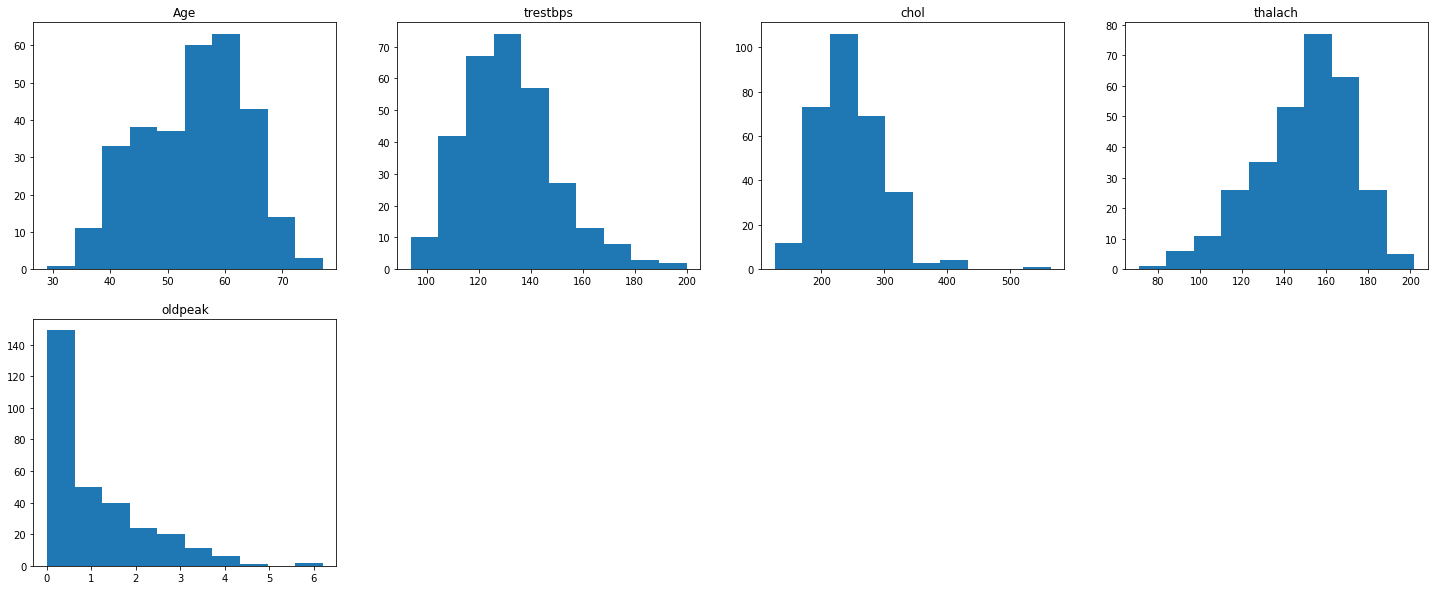

In [289]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Pasteles</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

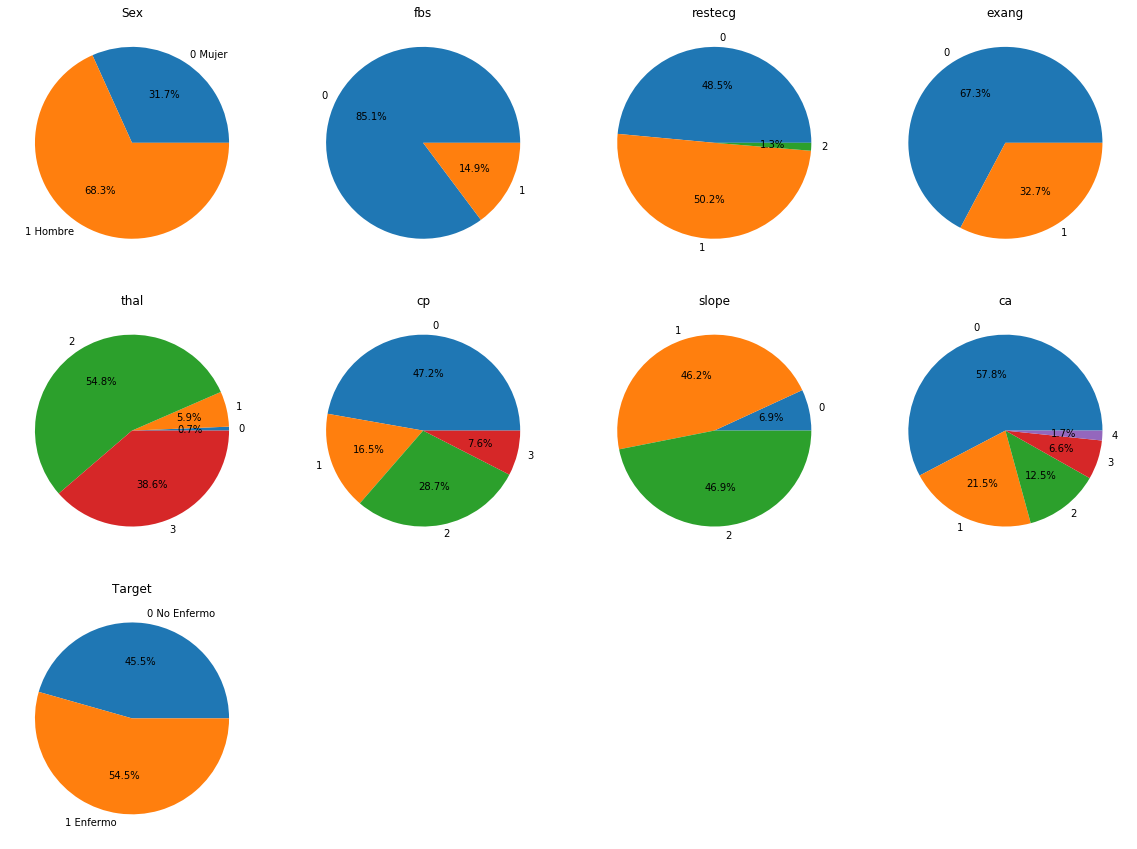

In [290]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0","1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [324]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar y probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


Numero de tuplas para entrenamiento : 242 <br>
Numero de tuplas para probar: 61

In [890]:
#Funcion auxiliar para la generacion de la grafica de la matriz de confusion 
def plot_confusion_matrix(cm,
                      

    target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('OrRd')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

El arbol de decisión se basa en encontrar una medida de seleccion de los atributos, es una heurística para seleccionar el criterio de división que divide los datos de la mejor manera posible. Este proceso genera un rango para cada atributo al explicar el conjunto de datos dado. El atributo de mejor puntaje se seleccionará como un atributo de división. 

In [997]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 4)

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9214876033057852
Test: 0.7704918032786885


Se puede apreciar que los resultados para el conjunto de entreanamiento y de prueba no son muy cercanos, esto se debe a que el modelo de clasificion del arbol de decision es un modelo poco estable y que en ciertos casos no garantiza resultados del todo confiables. Sin embargo que en base a la configuracion establecida anteriormente se llega a un buen rendimiento del conjunto de prueba entre un 75% y 78%.

<h2>Matriz de confusión</h2>

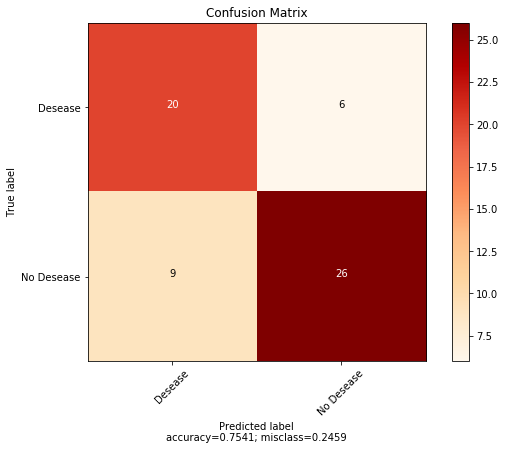

In [892]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol de decisión


(array([0.12325039, 0.33880799, 0.03170447, 0.0292478 , 0.04291719,
       0.06732487, 0.06375566, 0.        , 0.02025197, 0.12088678,
       0.03025295, 0.        , 0.13159991]), 0.8910891089108911)


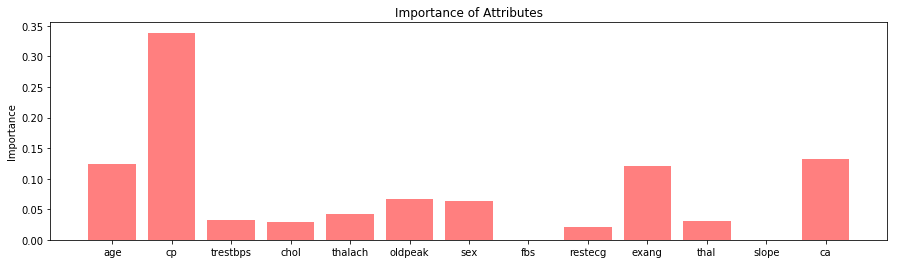

In [893]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

En este grafico se puede apreciar la importancia que tiene cada atributo sobre el conjunto de datos.
Durante de construccion del arbol se realizaron bastantes ejecuciones para determinar cual era el atributo que representaria al nodo padre, fue claro que el atributo que mas veces aparecia con una importancia mayor a la del resto era el Chest Pain.

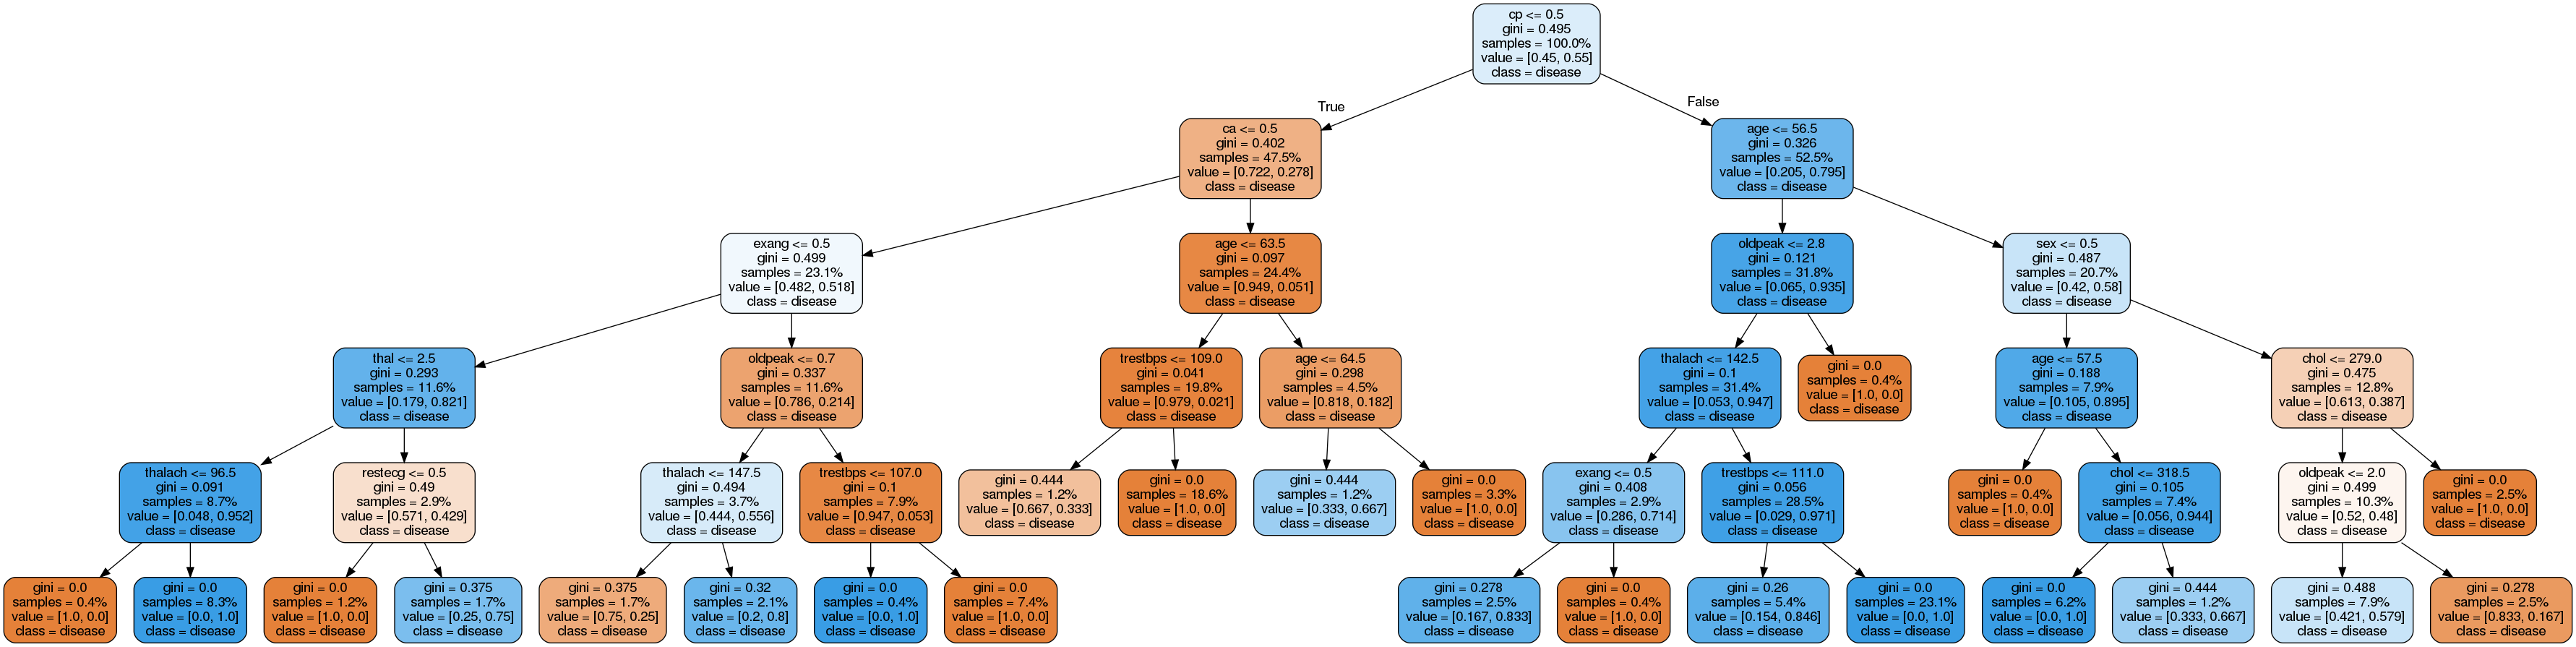

In [894]:
y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2>Interpretación</h2>

Es claro que se puede representar los resultados de una manera muy sencilla y facil de interpretar, debido a que se puede generar autamicamente una grafica que represente el proceso de seleccion de los atributos que influyen mas en una prediccion. Esto hace que el modelo de arboles de decision sea un modelo muy practico a la hora de entender como se ejecutan las condiciones y se generan resultados.

# Naive Bayes

El modelo de bayes ingenuo presenta una estrategia basada en el teorema de bayes

In [895]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8388429752066116
Test: 0.7868852459016393


<h2>Matriz de confusión</h2>

In [896]:
confusion_matrix(model2.predict(testX), testY)

array([[24,  8],
       [ 5, 24]])

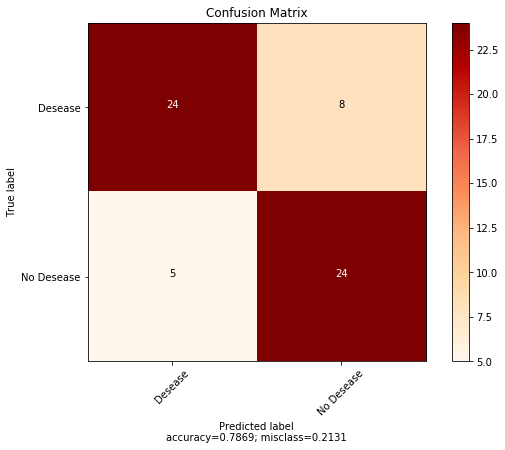

In [897]:
plot_confusion_matrix(cm = confusion_matrix(model2.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

# Red Neuronal

In [898]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='sgd', alpha=1e-3, activation = 'relu', max_iter=2000,
                     hidden_layer_sizes = (5, 5, 5, 5, 5), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

Iteration 1, loss = 0.82337539
Iteration 2, loss = 0.82252560
Iteration 3, loss = 0.82110933
Iteration 4, loss = 0.81923849
Iteration 5, loss = 0.81706214
Iteration 6, loss = 0.81466141
Iteration 7, loss = 0.81198199
Iteration 8, loss = 0.80919407
Iteration 9, loss = 0.80629460
Iteration 10, loss = 0.80323475
Iteration 11, loss = 0.80016596
Iteration 12, loss = 0.79703213
Iteration 13, loss = 0.79397938
Iteration 14, loss = 0.79091943
Iteration 15, loss = 0.78794061
Iteration 16, loss = 0.78496366
Iteration 17, loss = 0.78221804
Iteration 18, loss = 0.77924755
Iteration 19, loss = 0.77663082
Iteration 20, loss = 0.77386305
Iteration 21, loss = 0.77110185
Iteration 22, loss = 0.76851340
Iteration 23, loss = 0.76593961
Iteration 24, loss = 0.76333299
Iteration 25, loss = 0.76085603
Iteration 26, loss = 0.75845177
Iteration 27, loss = 0.75599387
Iteration 28, loss = 0.75378735
Iteration 29, loss = 0.75154759
Iteration 30, loss = 0.74930813
Iteration 31, loss = 0.74728969
Iteration 32, los

Iteration 275, loss = 0.63495842
Iteration 276, loss = 0.63458689
Iteration 277, loss = 0.63422248
Iteration 278, loss = 0.63383498
Iteration 279, loss = 0.63345438
Iteration 280, loss = 0.63306128
Iteration 281, loss = 0.63265072
Iteration 282, loss = 0.63225585
Iteration 283, loss = 0.63184146
Iteration 284, loss = 0.63143689
Iteration 285, loss = 0.63103148
Iteration 286, loss = 0.63066202
Iteration 287, loss = 0.63024580
Iteration 288, loss = 0.62985574
Iteration 289, loss = 0.62946040
Iteration 290, loss = 0.62901734
Iteration 291, loss = 0.62857388
Iteration 292, loss = 0.62813417
Iteration 293, loss = 0.62766098
Iteration 294, loss = 0.62722372
Iteration 295, loss = 0.62676647
Iteration 296, loss = 0.62629898
Iteration 297, loss = 0.62582860
Iteration 298, loss = 0.62534689
Iteration 299, loss = 0.62485534
Iteration 300, loss = 0.62439038
Iteration 301, loss = 0.62386765
Iteration 302, loss = 0.62337051
Iteration 303, loss = 0.62285070
Iteration 304, loss = 0.62233440
Iteration 

Iteration 539, loss = 0.48071227
Iteration 540, loss = 0.48021730
Iteration 541, loss = 0.47973660
Iteration 542, loss = 0.47918941
Iteration 543, loss = 0.47868494
Iteration 544, loss = 0.47818961
Iteration 545, loss = 0.47767228
Iteration 546, loss = 0.47713232
Iteration 547, loss = 0.47663778
Iteration 548, loss = 0.47610331
Iteration 549, loss = 0.47562270
Iteration 550, loss = 0.47512542
Iteration 551, loss = 0.47460855
Iteration 552, loss = 0.47411255
Iteration 553, loss = 0.47359471
Iteration 554, loss = 0.47308986
Iteration 555, loss = 0.47253071
Iteration 556, loss = 0.47200045
Iteration 557, loss = 0.47148123
Iteration 558, loss = 0.47095633
Iteration 559, loss = 0.47046925
Iteration 560, loss = 0.46997836
Iteration 561, loss = 0.46947901
Iteration 562, loss = 0.46896897
Iteration 563, loss = 0.46845776
Iteration 564, loss = 0.46793521
Iteration 565, loss = 0.46744593
Iteration 566, loss = 0.46699036
Iteration 567, loss = 0.46640930
Iteration 568, loss = 0.46588301
Iteration 

Iteration 823, loss = 0.37974583
Iteration 824, loss = 0.37946984
Iteration 825, loss = 0.37928792
Iteration 826, loss = 0.37894898
Iteration 827, loss = 0.37871059
Iteration 828, loss = 0.37844712
Iteration 829, loss = 0.37819773
Iteration 830, loss = 0.37793082
Iteration 831, loss = 0.37775876
Iteration 832, loss = 0.37742353
Iteration 833, loss = 0.37720894
Iteration 834, loss = 0.37694000
Iteration 835, loss = 0.37667772
Iteration 836, loss = 0.37650499
Iteration 837, loss = 0.37622628
Iteration 838, loss = 0.37601987
Iteration 839, loss = 0.37583448
Iteration 840, loss = 0.37566790
Iteration 841, loss = 0.37547711
Iteration 842, loss = 0.37527111
Iteration 843, loss = 0.37505878
Iteration 844, loss = 0.37485169
Iteration 845, loss = 0.37463125
Iteration 846, loss = 0.37439816
Iteration 847, loss = 0.37420187
Iteration 848, loss = 0.37398602
Iteration 849, loss = 0.37369349
Iteration 850, loss = 0.37349471
Iteration 851, loss = 0.37327190
Iteration 852, loss = 0.37307910
Iteration 

<h2>Matriz de confusión</h2>

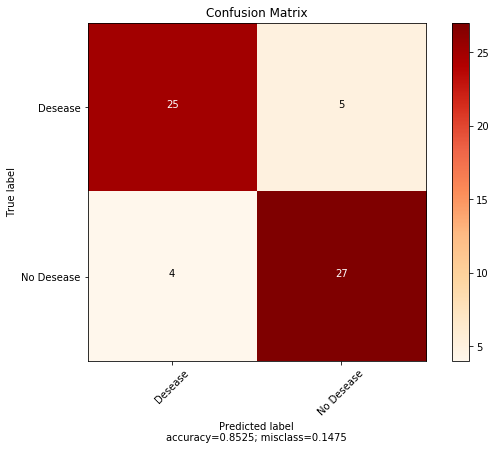

In [899]:
plot_confusion_matrix(cm = confusion_matrix(model3.predict(testXX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

In [900]:
print model3.coefs_

[array([[-1.68798975e-01,  2.87428997e-01, -5.62183132e-01,
         1.87502434e-02, -2.31331278e-01],
       [-4.77137206e-01, -2.01251910e-01,  1.50040109e-01,
         1.51653472e-01,  4.15181324e-01],
       [-2.22111721e-02,  1.43921169e-01, -3.48547270e-01,
         2.20295693e-01, -7.47735208e-01],
       [ 1.56192171e-01, -3.03380485e-02,  7.84138723e-02,
        -8.21714636e-02, -2.47312397e-01],
       [ 3.13016958e-01,  5.37857756e-01,  9.33488639e-03,
         2.97877307e-01,  4.10312101e-01],
       [ 4.37695402e-01, -5.94078034e-01, -5.41029885e-01,
        -3.44437418e-01,  2.48017313e-01],
       [-4.44047193e-01, -1.48328327e-01,  4.18665686e-01,
        -6.46107051e-01, -3.35900298e-04],
       [-1.24443680e-01,  2.45595793e-01,  3.84122690e-01,
        -5.27662264e-01,  4.43206957e-01],
       [ 5.06596998e-01,  3.01355289e-01, -4.14631171e-02,
         1.65553301e-01, -3.28965764e-01],
       [-7.54216632e-02,  4.99776790e-01, -3.32124861e-01,
        -4.81592944e-0

In [901]:
network = Sequential()
network.add(Dense(5, input_dim=13, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainXX, trainY, epochs=1000)

scoreT = network.evaluate(testXX, testY)
scoreE = network.evaluate(trainXX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)

Epoch 1/1000
242/242 [==============================] - 1s 4ms/step - loss: 10.3679 - binary_accuracy: 0.3545
Epoch 2/1000
242/242 [==============================] - 0s 61us/step - loss: 9.0502 - binary_accuracy: 0.3372
Epoch 3/1000
242/242 [==============================] - 0s 54us/step - loss: 8.9759 - binary_accuracy: 0.3446
Epoch 4/1000
242/242 [==============================] - 0s 67us/step - loss: 8.9370 - binary_accuracy: 0.3496
Epoch 5/1000
242/242 [==============================] - 0s 57us/step - loss: 8.9154 - binary_accuracy: 0.3554
Epoch 6/1000
242/242 [==============================] - 0s 69us/step - loss: 8.9006 - binary_accuracy: 0.3579
Epoch 7/1000
242/242 [==============================] - 0s 53us/step - loss: 8.8903 - binary_accuracy: 0.3603
Epoch 8/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8824 - binary_accuracy: 0.3603
Epoch 9/1000
242/242 [==============================] - 0s 49us/step - loss: 8.8767 - binary_accuracy: 0.3603
Epoch 10/1

242/242 [==============================] - 0s 61us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 75/1000
242/242 [==============================] - 0s 54us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 76/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 77/1000
242/242 [==============================] - 0s 55us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 78/1000
242/242 [==============================] - ETA: 0s - loss: 8.5627 - binary_accuracy: 0.375 - 0s 69us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 79/1000
242/242 [==============================] - 0s 52us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 80/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 81/1000
242/242 [==============================] - 0s 47us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 82/1000
242/242 [==============================] - 0s 51us/step - loss

242/242 [==============================] - 0s 73us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 148/1000
242/242 [==============================] - 0s 69us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 149/1000
242/242 [==============================] - 0s 76us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 150/1000
242/242 [==============================] - 0s 80us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 151/1000
242/242 [==============================] - 0s 56us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 152/1000
242/242 [==============================] - 0s 69us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 153/1000
242/242 [==============================] - 0s 82us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 154/1000
242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 155/1000
242/242 [==============================] - 0s 84us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 1

242/242 [==============================] - 0s 130us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 221/1000
242/242 [==============================] - 0s 130us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 222/1000
242/242 [==============================] - 0s 104us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 223/1000
242/242 [==============================] - 0s 133us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 224/1000
242/242 [==============================] - 0s 83us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 225/1000
242/242 [==============================] - 0s 101us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 226/1000
242/242 [==============================] - 0s 85us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 227/1000
242/242 [==============================] - 0s 59us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 228/1000
242/242 [==============================] - 0s 77us/step - loss: 8.8583 - binary_accuracy: 0.3603
Ep

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.279013). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140250). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


242/242 [==============================] - 0s 111us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 279/1000
242/242 [==============================] - 0s 86us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 280/1000
242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 281/1000
242/242 [==============================] - 0s 76us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 282/1000
242/242 [==============================] - 0s 80us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 283/1000
242/242 [==============================] - 0s 82us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 284/1000
242/242 [==============================] - 0s 110us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 285/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 286/1000
242/242 [==============================] - 0s 81us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch

242/242 [==============================] - 0s 91us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 352/1000
242/242 [==============================] - 0s 78us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 353/1000
242/242 [==============================] - 0s 76us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 354/1000
242/242 [==============================] - 0s 80us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 355/1000
242/242 [==============================] - 0s 97us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 356/1000
242/242 [==============================] - 0s 121us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 357/1000
242/242 [==============================] - 0s 88us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 358/1000
242/242 [==============================] - 0s 157us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 359/1000
242/242 [==============================] - 0s 75us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch

242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 425/1000
242/242 [==============================] - 0s 81us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 426/1000
242/242 [==============================] - 0s 64us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 427/1000
242/242 [==============================] - 0s 89us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 428/1000
242/242 [==============================] - 0s 56us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 429/1000
242/242 [==============================] - 0s 71us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 430/1000
242/242 [==============================] - ETA: 0s - loss: 8.5627 - binary_accuracy: 0.375 - 0s 82us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 431/1000
242/242 [==============================] - 0s 78us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 432/1000
242/242 [==============================] - 0s 96us/ste

242/242 [==============================] - 0s 97us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 497/1000
242/242 [==============================] - 0s 132us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 498/1000
242/242 [==============================] - 0s 98us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 499/1000
242/242 [==============================] - 0s 97us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 500/1000
242/242 [==============================] - 0s 68us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 501/1000
242/242 [==============================] - 0s 93us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 502/1000
242/242 [==============================] - 0s 83us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 503/1000
242/242 [==============================] - 0s 77us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 504/1000
242/242 [==============================] - 0s 86us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 

242/242 [==============================] - 0s 107us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 570/1000
242/242 [==============================] - 0s 85us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 571/1000
242/242 [==============================] - 0s 82us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 572/1000
242/242 [==============================] - 0s 88us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 573/1000
242/242 [==============================] - 0s 138us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 574/1000
242/242 [==============================] - 0s 122us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 575/1000
242/242 [==============================] - 0s 89us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 576/1000
242/242 [==============================] - 0s 106us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 577/1000
242/242 [==============================] - 0s 155us/step - loss: 8.8583 - binary_accuracy: 0.3603
Ep

242/242 [==============================] - 0s 66us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 643/1000
242/242 [==============================] - 0s 58us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 644/1000
242/242 [==============================] - 0s 63us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 645/1000
242/242 [==============================] - 0s 64us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 646/1000
242/242 [==============================] - 0s 60us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 647/1000
242/242 [==============================] - 0s 84us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 648/1000
242/242 [==============================] - 0s 56us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 649/1000
242/242 [==============================] - 0s 78us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 650/1000
242/242 [==============================] - 0s 65us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 6

242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 716/1000
242/242 [==============================] - 0s 61us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 717/1000
242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 718/1000
242/242 [==============================] - 0s 63us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 719/1000
242/242 [==============================] - 0s 71us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 720/1000
242/242 [==============================] - 0s 73us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 721/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 722/1000
242/242 [==============================] - 0s 80us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 723/1000
242/242 [==============================] - 0s 67us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 7

242/242 [==============================] - 0s 54us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 788/1000
242/242 [==============================] - 0s 53us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 789/1000
242/242 [==============================] - 0s 50us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 790/1000
242/242 [==============================] - 0s 57us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 791/1000
242/242 [==============================] - 0s 53us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 792/1000
242/242 [==============================] - 0s 72us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 793/1000
242/242 [==============================] - 0s 51us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 794/1000
242/242 [==============================] - 0s 74us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 795/1000
242/242 [==============================] - 0s 48us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 7

242/242 [==============================] - 0s 55us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 861/1000
242/242 [==============================] - 0s 53us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 862/1000
242/242 [==============================] - 0s 57us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 863/1000
242/242 [==============================] - 0s 60us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 864/1000
242/242 [==============================] - 0s 51us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 865/1000
242/242 [==============================] - 0s 96us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 866/1000
242/242 [==============================] - 0s 63us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 867/1000
242/242 [==============================] - 0s 65us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 868/1000
242/242 [==============================] - 0s 57us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 8

242/242 [==============================] - 0s 76us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 934/1000
242/242 [==============================] - 0s 62us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 935/1000
242/242 [==============================] - 0s 82us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 936/1000
242/242 [==============================] - 0s 170us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 937/1000
242/242 [==============================] - 0s 122us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 938/1000
242/242 [==============================] - 0s 76us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 939/1000
242/242 [==============================] - 0s 89us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 940/1000
242/242 [==============================] - 0s 110us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoch 941/1000
242/242 [==============================] - 0s 70us/step - loss: 8.8583 - binary_accuracy: 0.3603
Epoc

In [902]:
network.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_80 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_81 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_82 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_83 (Dense)             (None, 5)                 30        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [903]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[ 0.48680794,  0.28779057, -0.43655467,  0.3061607 , -0.22861949],
       [-0.2195463 , -0.1814409 ,  0.5144225 , -0.15307628, -0.3797481 ],
       [-0.008228  ,  0.00090485,  0.11056016, -0.17086238,  0.4131076 ],
       [ 0.17958412, -0.10165524,  0.49158695,  0.0869953 ,  0.3821124 ],
       [-0.14480501,  0.2138405 , -0.38950145, -0.53990984, -0.48151824],
       [-0.24892934,  0.48608693, -0.4026146 , -0.4274917 , -0.49756134],
       [-0.42506945, -0.5633342 , -0.4143605 , -0.13941428, -0.3947164 ],
       [ 0.03551343,  0.46809477,  0.13131051, -0.3184391 ,  0.52989274],
       [-0.01326372,  0.49643728,  0.5182759 , -0.41650605,  0.50952595],
       [-0.4341133 ,  0.11551105, -0.28684568,  0.1820588 , -0.06091575],
       [-0.20865637, -0.02701254, -0.4620456 ,  0.32069498, -0.10385662],
       [ 0.12335683,  0.14551412,  0.22382748, -0.42014277, -0.36224088],
       [ 0.15547629, -0.35128543, -0.3312707 ,  0.43600148,  0.23538788]],
      dtype=float32), array([ 0.0266

<h2>Interpretación</h2>

# Comparación de los modelos 

# Conclusiones